In [1]:
from math import log
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [14]:
file_names = ['GSM2230757_human1_umifm_counts.csv.gz', 'GSM2230758_human2_umifm_counts.csv.gz', \
              'GSM2230759_human3_umifm_counts.csv.gz', 'GSM2230760_human4_umifm_counts.csv.gz']
base_path =  '/home/wanxinli/nSimplices/data/GSE84133_RAW'
headers = []


for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    count_df = pd.read_csv(file_path, header=0, index_col=0)
    # print(count_df.head())
    print(count_df.shape)
    headers.append(count_df.columns)

# count_array = np.array(count_df)
# count_cell  = np.sum(count_array, axis=1)
# print(count_cell)
# print(max(count_cell))
# plt.hist(count_cell)
# plt.show()


(1937, 20127)
(1724, 20127)
(3605, 20127)
(1303, 20127)


In [20]:
base_path =  '/home/wanxinli/nSimplices/data/GSE84133_RAW'
file_name = 'GSM2230757_human1_umifm_counts.csv.gz'

file_path = os.path.join(base_path, file_name)
count_df = pd.read_csv(file_path, header=0, index_col=0)
count_df = count_df.drop(['barcode', 'assigned_cluster'], axis=1)
print(count_df.head())
# del count_df['barcode', 'assigned_cluster']


                             A1BG  A1CF  A2M  A2ML1  A4GALT  A4GNT  AA06  \
human1_lib1.final_cell_0001     0     4    0      0       0      0     0   
human1_lib1.final_cell_0002     0     0    0      0       0      0     0   
human1_lib1.final_cell_0003     0     0    0      0       0      0     0   
human1_lib1.final_cell_0004     0     0    0      0       0      0     0   
human1_lib1.final_cell_0005     0     0    0      0       0      0     0   

                             AAAS  AACS  AACSP1  ...  ZWILCH  ZWINT  ZXDA  \
human1_lib1.final_cell_0001     0     0       0  ...       0      0     0   
human1_lib1.final_cell_0002     0     2       0  ...       0      0     0   
human1_lib1.final_cell_0003     0     0       0  ...       0      0     0   
human1_lib1.final_cell_0004     1     0       0  ...       1      0     0   
human1_lib1.final_cell_0005     0     0       0  ...       0      0     0   

                             ZXDB  ZXDC  ZYG11B  ZYX  ZZEF1  ZZZ3  pk  
human1_l

In [17]:
list(set(count_df['assigned_cluster']))

['macrophage',
 'alpha',
 'ductal',
 't_cell',
 'acinar',
 'beta',
 'epsilon',
 'mast',
 'activated_stellate',
 'endothelial',
 'quiescent_stellate',
 'delta',
 'schwann',
 'gamma']

[22412 27953 16895 ...  1913  1746  1503]
32472


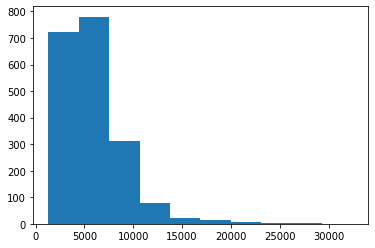

0
1


KeyboardInterrupt: 

In [21]:
count_array = np.array(count_df)
count_cell  = np.sum(count_array, axis=1)
print(count_cell)
print(max(count_cell))
plt.hist(count_cell)
plt.show()


# In[3]:


count_df


# In[4]:


def custom_log(count, total_count):
    if count == 0:
        return 0
    return log(count/total_count*(10**4)+1)


# In[5]:


for i in range(count_df.shape[0]):
    print(i)
    for j in range(count_df.shape[1]):
        # print(j)
        count_df.iat[i, j] = custom_log(count_df.iat[i, j], count_cell[i])